# Business license EDA

This notebook takes a look at the business license data from the [Vancouver Open Data Portal](https://opendata.vancouver.ca) with an eye to building a model to predict the likelihood of a new business surviving.

Extension ideas:

* incorporate property tax data

In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('../data/2020.11.15-business-licences.csv', sep=';')

In [59]:
df.head()

,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,...,Street,City,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom
0,14,2118891,14-106531,0,Gill Framing Co Ltd,NaN,Issued,2013-12-24T12:08:01-08:00,2014-12-31,Contractor,...,NaN,Vancouver,BC,CA,NaN,Kensington-Cedar Cottage,0.0,159.0,2019-07-21T13:49:10-07:00,NaN
1,14,2118895,14-106535,0,ITC Residential BC II Inc,NaN,Inactive,2013-12-04T09:35:13-08:00,2014-12-31,Contractor,...,HOWE ST,Vancouver,BC,CA,V6Z 2N1,Downtown,0.0,159.0,2019-07-21T13:49:10-07:00,"{""type"": ""Point"", ""coordinates"": [-123.1320030..."
2,14,2118901,14-106541,0,Quoc Khanh Nguyen (Quoc Nguyen),K & H Renovation,Gone Out of Business,NaN,NaN,Contractor,...,NaN,Vancouver,BC,CA,NaN,Hastings-Sunrise,0.0,NaN,2019-07-21T13:49:10-07:00,NaN
3,14,2118906,14-106546,0,Evershine Enterprises Ltd,NaN,Issued,2014-02-13T14:30:55-08:00,2014-12-31,Contractor,...,NaN,Vancouver,BC,CA,NaN,Sunset,1.0,199.0,2019-07-21T13:49:10-07:00,NaN
4,14,2118912,14-106552,0,Zhao Peng Li (Zhao Li),NaN,Issued,2013-12-13T09:53:14-08:00,2014-12-31,Contractor,...,NaN,Vancouver,BC,CA,NaN,Kensington-Cedar Cottage,0.0,159.0,2019-07-21T13:49:10-07:00,NaN


In [54]:
df.columns

Index(['FOLDERYEAR', 'LicenceRSN', 'LicenceNumber', 'LicenceRevisionNumber',
       'BusinessName', 'BusinessTradeName', 'Status', 'IssuedDate',
       'ExpiredDate', 'BusinessType', 'BusinessSubType', 'Unit', 'UnitType',
       'House', 'Street', 'City', 'Province', 'Country', 'PostalCode',
       'LocalArea', 'NumberofEmployees', 'FeePaid', 'ExtractDate', 'Geom',
       'ln_no_year'],
      dtype='object')

In [55]:
df = df.loc[df['Province']=='BC']
df = df.loc[df['BusinessName'].notnull()]

In [56]:
df.shape

(490815, 25)

In [41]:
df['ln_no_year'] = df['LicenceNumber'].str[3:].str.strip()
issued = df.loc[df['Status'] == 'Issued']
issued['lic_dups'] = issued['ln_no_year'].duplicated(keep=False)
issued.loc[issued['lic_dups']].sort_values(['ln_no_year', 'FOLDERYEAR']).head(10)


,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,...,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom,ln_no_year,lic_dups
125314,14,2098472,14-100127,0,Zenergy Electric Ltd,NaN,Issued,2013-10-02T12:41:09-07:00,2014-12-31,Electrical Contractor,...,BC,CA,NaN,Killarney,1.0,129.0,2019-07-21T13:49:09-07:00,NaN,100127,True
26720,17,2776396,17-100127,0,Our Lady of Sorrows Church Society,NaN,Issued,2017-02-28T12:39:32-08:00,2017-12-31,Assembly Hall,...,BC,CA,V6B 2A7,Hastings-Sunrise,9.0,179.0,2020-01-01T02:32:01-08:00,"{""type"": ""Point"", ""coordinates"": [-123.0501537...",100127,True
92545,14,2098516,14-100128,0,Vancouver Quality Home Air Systems Ltd,NaN,Issued,2013-10-02T14:44:36-07:00,2014-12-31,Contractor - Special Trades,...,BC,CA,NaN,Renfrew-Collingwood,0.0,157.0,2019-07-21T13:49:09-07:00,NaN,100128,True
303376,17,2776397,17-100128,0,Canadian Mortgage & Housing Corporation,Performance Works,Issued,2016-11-18T12:33:15-08:00,2017-12-31,Assembly Hall,...,BC,CA,V6H 3R8,Fairview,10.0,139.0,2020-01-01T02:32:01-08:00,"{""type"": ""Point"", ""coordinates"": [-123.1317825...",100128,True
243175,14,2098980,14-100129,0,MLG Construction Limited,NaN,Issued,2013-10-03T11:56:45-07:00,2014-12-31,Office,...,BC,CA,NaN,Hastings-Sunrise,1.0,129.0,2019-07-21T13:49:09-07:00,NaN,100129,True
159661,17,2776398,17-100129,0,Meridian Cultural Society,NaN,Issued,2017-01-06T09:56:20-08:00,2017-12-31,Assembly Hall,...,BC,CA,V5N 4N5,Kensington-Cedar Cottage,0.0,139.0,2020-01-01T02:32:01-08:00,"{""type"": ""Point"", ""coordinates"": [-123.0647082...",100129,True
243178,14,2098997,14-100130,0,Milton Michael Sorokin (Milton Sorokin),Holly West Electric Co,Issued,2013-10-03T12:39:49-07:00,2014-12-31,Electrical Contractor,...,BC,CA,NaN,Riley Park,1.0,129.0,2019-07-21T13:49:09-07:00,NaN,100130,True
303377,17,2776399,17-100130,0,RMR Vancouver Station Ltd,Rocky Mountaineer Vacations,Issued,2016-12-19T13:29:53-08:00,2017-12-31,Assembly Hall,...,BC,CA,V6A 2L8,Strathcona,35.0,139.0,2020-01-01T02:32:01-08:00,"{""type"": ""Point"", ""coordinates"": [-123.0908114...",100130,True
92559,14,2099514,14-100131,0,Naam Developments Ltd,NaN,Issued,2013-10-04T13:10:42-07:00,2014-12-31,Contractor,...,BC,CA,NaN,Oakridge,2.0,157.0,2019-07-21T13:49:09-07:00,NaN,100131,True
26722,17,2776400,17-100131,0,The Association Of United Ukrainian Canadians,NaN,Issued,2016-12-30T10:09:06-08:00,2017-12-31,Assembly Hall,...,BC,CA,V6E 1V9,Strathcona,0.0,139.0,2020-01-01T02:32:01-08:00,"{""type"": ""Point"", ""coordinates"": [-123.0870172...",100131,True


In [53]:
df.loc[df['BusinessName'].notnull()].sort_values('BusinessName').head(20)

,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,...,City,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom,ln_no_year
425935,18,3100450,18-516072,0,!Exotics BySIYTHE Corporation,NaN,Issued,2018-02-14T09:40:11-08:00,2018-12-31,Office,...,Vancouver,BC,CA,V6B 2Z4,Downtown,1.0,189.0,2020-11-01T02:32:31-08:00,"{""type"": ""Point"", ""coordinates"": [-123.1119263...",516072
365017,19,3265242,19-139570,0,!Exotics BySIYTHE Corporation,NaN,Pending,2019-08-15T10:17:53-07:00,2019-12-31,Office,...,Vancouver,BC,CA,V6B 2Z4,Downtown,1.0,50.0,2020-11-01T02:32:36-08:00,"{""type"": ""Point"", ""coordinates"": [-123.1119263...",139570
241092,14,2154232,14-141822,0,#1 Antique Warehouse Furnishings Ltd,#1 Antique Warehouse Furnishing,Issued,2013-12-12T14:12:39-08:00,2014-12-31,Retail Dealer,...,Vancouver,BC,CA,V5X 2R5,Marpole,6.0,130.0,2019-07-21T13:49:12-07:00,"{""type"": ""Point"", ""coordinates"": [-123.1107282...",141822
226175,13,1813121,13-193702,0,#1 Antique Warehouse Furnishings Ltd,#1 Antique Warehouse Furnishing,Issued,2012-12-16T15:57:15-08:00,2013-12-31,Retail Dealer,...,Vancouver,BC,CA,V5X 2R5,Marpole,6.0,129.0,2019-07-21T13:49:08-07:00,"{""type"": ""Point"", ""coordinates"": [-123.1107282...",193702
354375,18,3035854,18-467546,0,#1 Antique Warehouse Furnishings Ltd,#1 Antique Warehouse Furnishing,Issued,2018-02-15T17:16:23-08:00,2018-12-31,Retail Dealer,...,Vancouver,BC,CA,V5X 2R5,Marpole,8.0,185.0,2020-11-01T02:32:29-08:00,"{""type"": ""Point"", ""coordinates"": [-123.1107282...",467546
18689,16,2600156,16-141326,0,#1 Antique Warehouse Furnishings Ltd,#1 Antique Warehouse Furnishing,Issued,2015-12-22T17:38:02-08:00,2016-12-31,Retail Dealer,...,Vancouver,BC,CA,V5X 2R5,Marpole,5.0,136.0,2019-07-21T13:49:20-07:00,"{""type"": ""Point"", ""coordinates"": [-123.1107282...",141326
366216,19,3269841,19-144084,0,#1 Antique Warehouse Furnishings Ltd,#1 Antique Warehouse Furnishing,Issued,2019-02-01T14:19:41-08:00,2019-12-31,Retail Dealer,...,Vancouver,BC,CA,V5X 2R5,Marpole,4.0,191.0,2020-11-01T02:32:36-08:00,"{""type"": ""Point"", ""coordinates"": [-123.1107282...",144084
63768,17,2815952,17-139639,0,#1 Antique Warehouse Furnishings Ltd,#1 Antique Warehouse Furnishing,Issued,2016-12-02T17:36:00-08:00,2017-12-31,Retail Dealer,...,Vancouver,BC,CA,V5X 2R5,Marpole,5.0,139.0,2020-01-01T02:32:04-08:00,"{""type"": ""Point"", ""coordinates"": [-123.1107282...",139639
108003,15,2371614,15-141890,0,#1 Antique Warehouse Furnishings Ltd,#1 Antique Warehouse Furnishing,Issued,2014-12-17T12:50:21-08:00,2015-12-31,Retail Dealer,...,Vancouver,BC,CA,V5X 2R5,Marpole,6.0,133.0,2019-07-21T13:49:16-07:00,"{""type"": ""Point"", ""coordinates"": [-123.1107282...",141890
451807,20,3499427,20-146214,0,#1 Antique Warehouse Furnishings Ltd,#1 Antique Warehouse Furnishing,Issued,2019-12-14T15:35:48-08:00,2020-12-31,Retail Dealer,...,Vancouver,BC,CA,V5X 2R5,Marpole,7.0,155.0,2020-11-15T00:09:32-08:00,"{""type"": ""Point"", ""coordinates"": [-123.1107282...",146214


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509444 entries, 0 to 509443
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FOLDERYEAR             509444 non-null  int64  
 1   LicenceRSN             509444 non-null  int64  
 2   LicenceNumber          509444 non-null  object 
 3   LicenceRevisionNumber  509444 non-null  int64  
 4   BusinessName           493514 non-null  object 
 5   BusinessTradeName      207726 non-null  object 
 6   Status                 509444 non-null  object 
 7   IssuedDate             424090 non-null  object 
 8   ExpiredDate            423765 non-null  object 
 9   BusinessType           509444 non-null  object 
 10  BusinessSubType        277373 non-null  object 
 11  Unit                   136789 non-null  object 
 12  UnitType               136748 non-null  object 
 13  House                  286350 non-null  object 
 14  Street                 286363 non-nu

In [6]:
df['Status'].value_counts()

Issued                  404179
Pending                  42917
Gone Out of Business     39868
Inactive                 12187
Cancelled                10293
Name: Status, dtype: int64

In [19]:
set([x[:10] for x in df['ExtractDate'].unique()])

{'2019-07-21', '2020-01-01', '2020-11-01', '2020-11-15'}

In [23]:
df['extract_date'] = df['ExtractDate'].str[:10]
df.groupby(['extract_date', 'FOLDERYEAR'])['LicenceRSN'].count().unstack(level=0)

extract_date,2019-07-21,2020-01-01,2020-11-01,2020-11-15
FOLDERYEAR,,,,
13,60915.0,NaN,NaN,NaN
14,60581.0,NaN,NaN,NaN
15,60938.0,NaN,NaN,NaN
16,61394.0,NaN,NaN,NaN
17,NaN,60060.0,NaN,NaN
18,NaN,NaN,66180.0,NaN
19,NaN,NaN,70775.0,NaN
20,NaN,NaN,NaN,68601.0


According to the documentation, `ExtractDate` is the date that the data was extracted from the source table. From the above, we can see that only the last three years were extracted recently. This means any company established in 2016 or earlier that went out of busines since July 2019 will be wrongly listed as still being active. As a result, we'll probably see a lower share of out of inactive businesses than actually exist.

In [12]:
df['FOLDERYEAR'].value_counts().sort_index(ascending=False)

20    68601
19    70775
18    66180
17    60060
16    61394
15    60938
14    60581
13    60915
Name: FOLDERYEAR, dtype: int64

In [30]:
#df['IssuedDate'] = pd.to_datetime(df['IssuedDate'].str.split('T').str[0])
df['ExpiredDate'] = pd.to_datetime(df['ExpiredDate'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509444 entries, 0 to 509443
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FOLDERYEAR             509444 non-null  int64         
 1   LicenceRSN             509444 non-null  int64         
 2   LicenceNumber          509444 non-null  object        
 3   LicenceRevisionNumber  509444 non-null  int64         
 4   BusinessName           493514 non-null  object        
 5   BusinessTradeName      207726 non-null  object        
 6   Status                 509444 non-null  object        
 7   IssuedDate             424090 non-null  datetime64[ns]
 8   ExpiredDate            423765 non-null  datetime64[ns]
 9   BusinessType           509444 non-null  object        
 10  BusinessSubType        277373 non-null  object        
 11  Unit                   136789 non-null  object        
 12  UnitType               136748 non-null  obje

In [12]:
status = df.groupby('FOLDERYEAR')['Status'].value_counts()

In [13]:
status = status.reset_index(name='count')

<AxesSubplot:xlabel='FOLDERYEAR'>

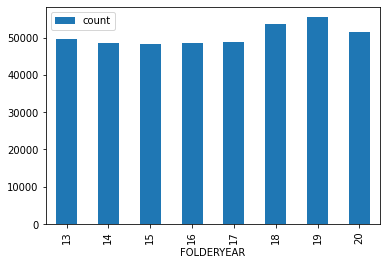

In [15]:
status.loc[status['Status']=='Issued'].plot(x='FOLDERYEAR', y='count', kind='bar')

<AxesSubplot:xlabel='FOLDERYEAR'>

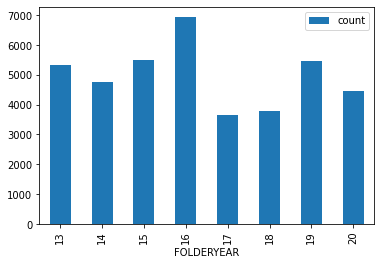

In [16]:
status.loc[status['Status']=='Gone Out of Business'].plot(x='FOLDERYEAR', y='count', kind='bar')

In [45]:
df['LicenceNumber'].duplicated().sum()

11630